In [1]:
from sklearn.neighbors import KernelDensity
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd 
import seaborn as sn 

 - 0.9 ∗ N(5, 1) + 0.1 ∗ N(10, 1).

In [2]:
n = 2000
true_x = np.random.normal(5, 1, n)
mask = np.random.choice([False, True], size=n, p=[0.9, 0.1])
true_x[mask] = np.random.normal(10, 1, mask.sum())

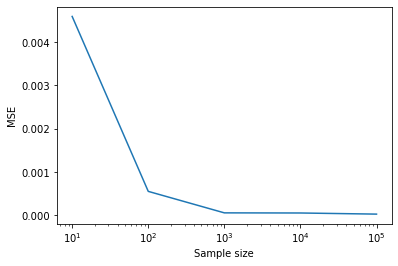

In [3]:
ns = [10, 100, 1000, 10000, 100000]
mses = []
fig, ax = plt.subplots(figsize=(6,4))
x_plot = np.linspace(2, 12, 2000)[:, np.newaxis]

x_plot_true = 0.9 * norm(5, 1).pdf(x_plot[:, 0]) + 0.1 * norm(10, 1).pdf(x_plot[:, 0])

for n in ns: 
    true_x = np.random.normal(5, 1, n)
    mask = np.random.choice([False, True], size=n, p=[0.9, 0.1])
    true_x[mask] = np.random.normal(10, 1, mask.sum())
    x_plot_pred = np.exp(KernelDensity(bandwidth=0.3)\
                             .fit(true_x.reshape(-1, 1))\
                             .score_samples(x_plot))
    mses.append(((x_plot_pred - x_plot_true)**2).mean())
ax.plot(ns, mses)
ax.set_xlabel('Sample size')
ax.set_ylabel('MSE')
ax.set_xscale('log')

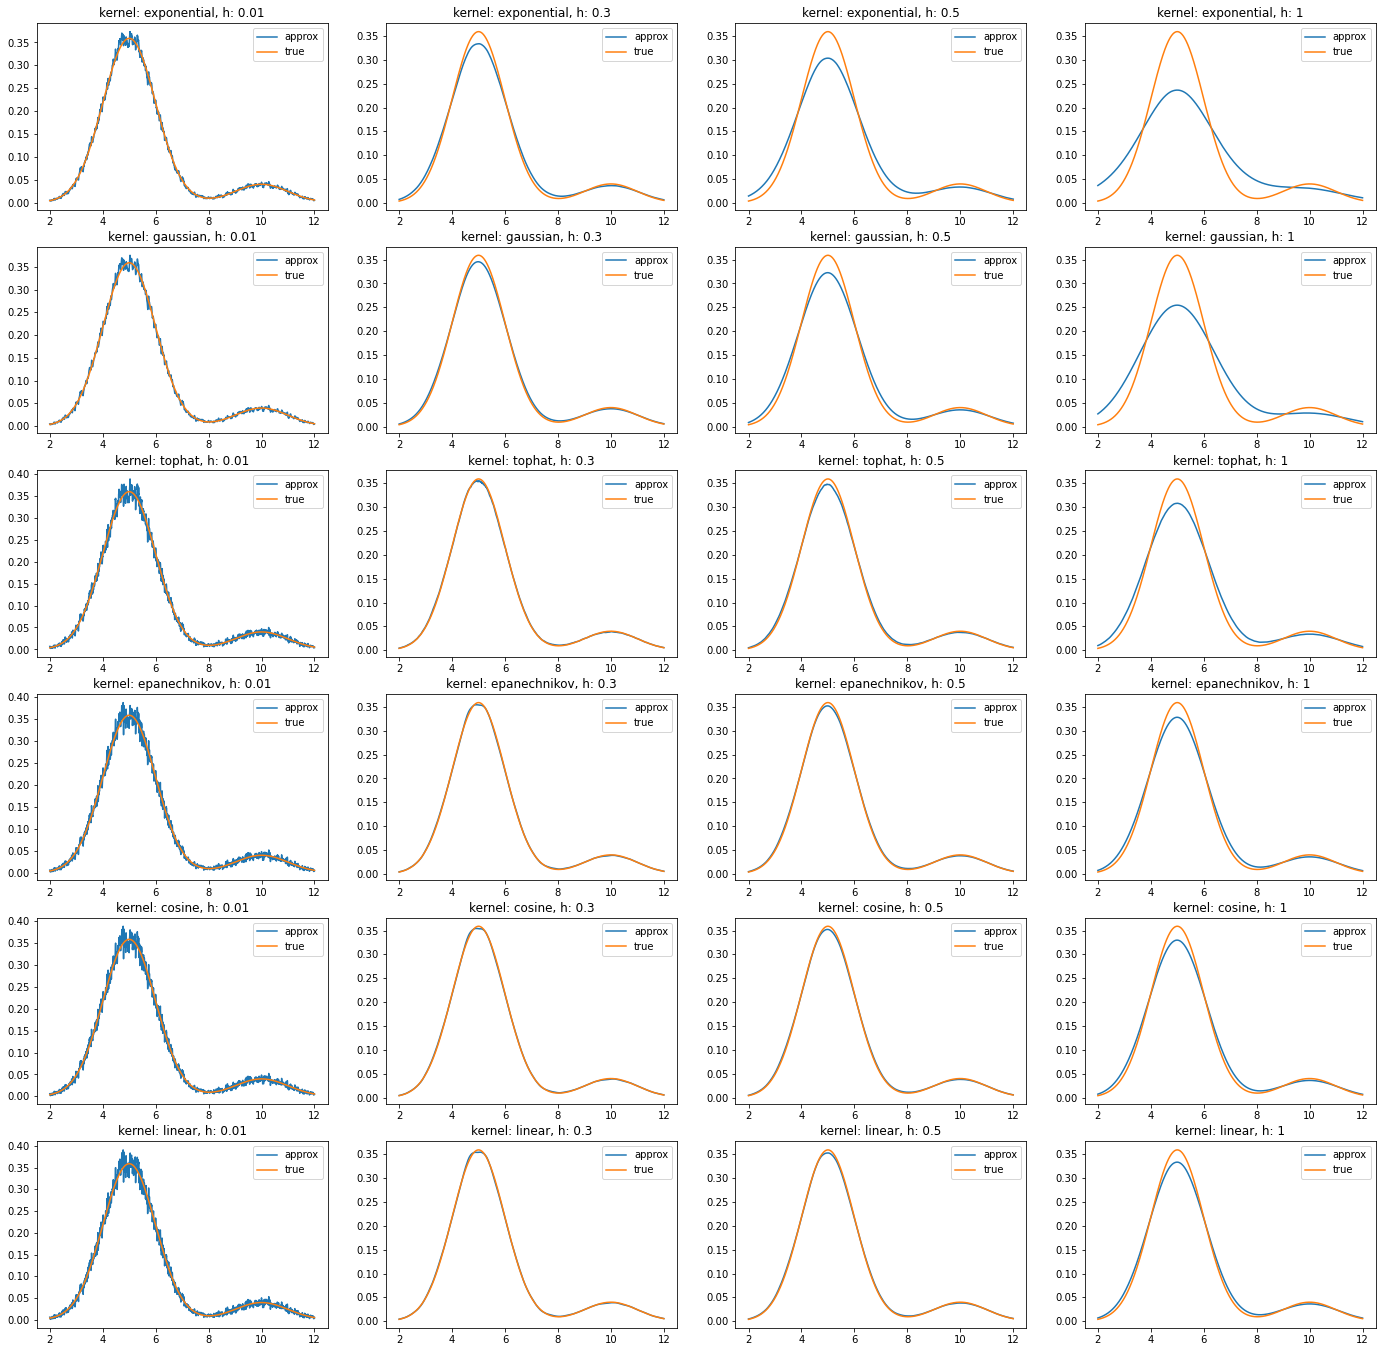

In [11]:
kernels = {'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'}
bandwidths = [0.01, 0.3, 0.5, 1]
fig, axs = plt.subplots(nrows=len(kernels), ncols=len(bandwidths), 
                        figsize=(6*len(bandwidths), 4*len(kernels)))
n = 2000
x_plot = np.linspace(2, 12, n)[:, np.newaxis]
mses = []
for i, kernel in enumerate(kernels): 
    for j, bandwidth in enumerate(bandwidths):
        x_plot_pred = np.exp(KernelDensity(bandwidth=bandwidth, kernel=kernel)\
                             .fit(true_x.reshape(-1, 1))\
                             .score_samples(x_plot))

        axs[i, j].plot(x_plot, x_plot_pred, label='approx')
        axs[i, j].plot(x_plot, x_plot_true, label='true')
        mses.append((kernel, bandwidth, ((x_plot_pred - x_plot_true)**2).mean()))
        axs[i, j].legend()
        axs[i, j].set_title(f'kernel: {kernel}, h: {bandwidth}')


In [12]:
mses = pd.DataFrame(mses, columns=['kernel', 'bandwidth', 'MSE'])

<AxesSubplot:xlabel='bandwidth', ylabel='MSE'>

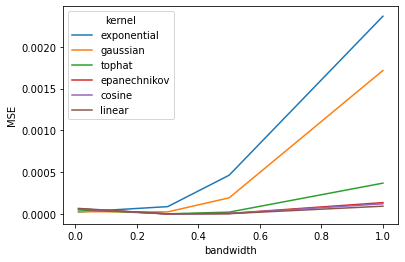

In [13]:
sn.lineplot(data=mses, hue='kernel', x='bandwidth', y='MSE')

In [14]:
df = pd.read_csv('earthquake.txt', sep=' ')

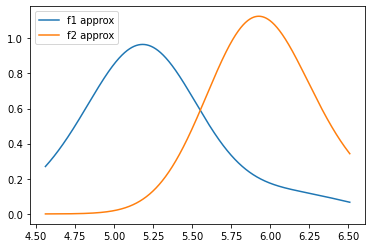

In [15]:
n = 2000 
x_plot = np.linspace(df['body'].min(), df['body'].max(), n).reshape(-1, 1)
f_1 = df[df['popn'] == 'equake'][['body']]
f_2 = df[df['popn'] == 'explosn'][['body']]
f_1_pred = np.exp(KernelDensity(bandwidth=0.3).fit(f_1).score_samples(x_plot))
f_2_pred = np.exp(KernelDensity(bandwidth=0.3).fit(f_2).score_samples(x_plot))
plt.plot(x_plot, f_1_pred, label='f1 approx')
plt.plot(x_plot, f_2_pred, label='f2 approx')
plt.legend()

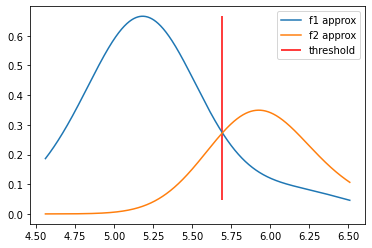

In [16]:
p_1 = len(f_1)/len(df)
p_2 = len(f_2)/len(df)

plt.plot(x_plot, f_1_pred*p_1, label='f1 approx')
plt.plot(x_plot, f_2_pred*p_2, label='f2 approx')
plt.vlines(x_plot[np.abs((f_1_pred*p_1 - f_2_pred*p_2)).argmin()], 
           min(f_1_pred*p_1), max(f_1_pred*p_1), color='red', label='threshold')
plt.legend()